# <a id='toc1_'></a>[$$Assignment: Decision Trees-and-Random Forests$$](#toc0_)

---

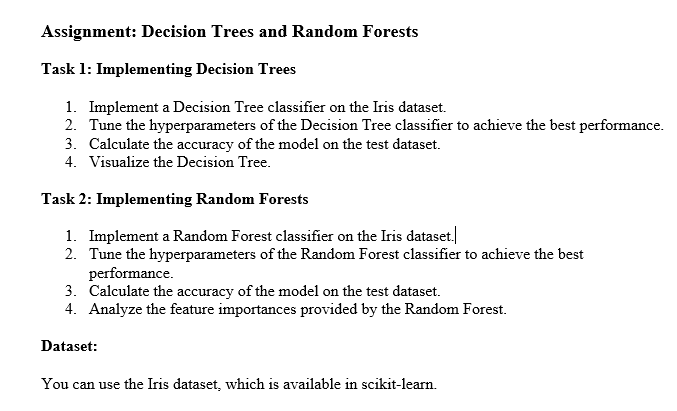

---

# **Table of contents**<a id='toc0_'></a>    
[$$Assignment: Decision Trees-and-Random Forests$$](#toc1_)    
  - [Required Libraries](#toc1_1_)    
  - [Loading Iris Dataset](#toc1_2_)    
  - [Split the dataset into training and testing sets](#toc1_3_)    
- [Task-1: Decision Trees](#toc2_)    
  - [Implementing Decision Trees](#toc2_1_)    
    - [Implement a Decision Tree classifier on the Iris dataset](#toc2_1_1_)    
    - [Tune the hyperparameters of the Decision Tree classifier](#toc2_1_2_)    
      - [GridSearchCV](#toc2_1_2_1_)    
      - [Get the best parameters](#toc2_1_2_2_)    
      - [Prediction on the test set](#toc2_1_2_3_)    
      - [Calculating Accuracy of Decision tree with best parameter model](#toc2_1_2_4_)    
    - [Visualize the Decision Tree](#toc2_1_3_)    
- [Task 2: Random Forest](#toc3_)    
  - [Implementing Random Forests](#toc3_1_)    
    - [Implement a Random Forest classifier on the Iris dataset](#toc3_1_1_)    
    - [Tune the hyperparameters of the Random Forest classifier](#toc3_1_2_)    
      - [GridSearchCV](#toc3_1_2_1_)    
      - [Get the best parameters](#toc3_1_2_2_)    
      - [Prediction on the test set](#toc3_1_2_3_)    
      - [ Calculate the accuracy of the model on the test dataset](#toc3_1_2_4_)    
    - [Analyze the feature importances provided by the Random Forest](#toc3_1_3_)    
      - [Plot feature importances](#toc3_1_3_1_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

---

## <a id='toc1_1_'></a>[Required Libraries](#toc0_)

In [1]:
try:
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    from sklearn.datasets import load_iris
    from sklearn.model_selection import train_test_split, GridSearchCV
    from sklearn.tree import DecisionTreeClassifier, plot_tree
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import accuracy_score
except:
    !pip install pandas
    !pip install numpy
    !pip install scikit-learn
    
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    from sklearn.datasets import load_iris
    from sklearn.model_selection import train_test_split, GridSearchCV
    from sklearn.tree import DecisionTreeClassifier, plot_tree
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import accuracy_score    

---

## <a id='toc1_2_'></a>[Loading Iris Dataset](#toc0_)

In [2]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

---

## <a id='toc1_3_'></a>[Split the dataset into training and testing sets](#toc0_)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

---

# <a id='toc2_'></a>[Task-1: Decision Trees](#toc0_)

---

## <a id='toc2_1_'></a>[Implementing Decision Trees](#toc0_)


### <a id='toc2_1_1_'></a>[Implement a Decision Tree classifier on the Iris dataset](#toc0_)

In [4]:
decision_tree = DecisionTreeClassifier(random_state=42)

In [5]:
# Fit the model to the training data
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

---

### <a id='toc2_1_2_'></a>[Tune the hyperparameters of the Decision Tree classifier](#toc0_)

In [6]:

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

#### <a id='toc2_1_2_1_'></a>[GridSearchCV](#toc0_)

In [7]:

# Use GridSearchCV to tune the hyperparameters
grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

#### <a id='toc2_1_2_2_'></a>[Get the best parameters](#toc0_)

In [8]:
# Get the best parameters
best_params_dt = grid_search.best_params_
print(f"Best hyperparameters for Decision Tree: {best_params_dt}")

Best hyperparameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}


#### <a id='toc2_1_2_3_'></a>[Prediction on the test set](#toc0_)

In [9]:

# Predict on the test set
y_pred_dt = grid_search.best_estimator_.predict(X_test)

#### <a id='toc2_1_2_4_'></a>[Calculating Accuracy of Decision tree with best parameter model](#toc0_)

In [10]:

# Calculate accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree accuracy: {accuracy_dt}")

Decision Tree accuracy: 1.0


---

### <a id='toc2_1_3_'></a>[Visualize the Decision Tree](#toc0_)

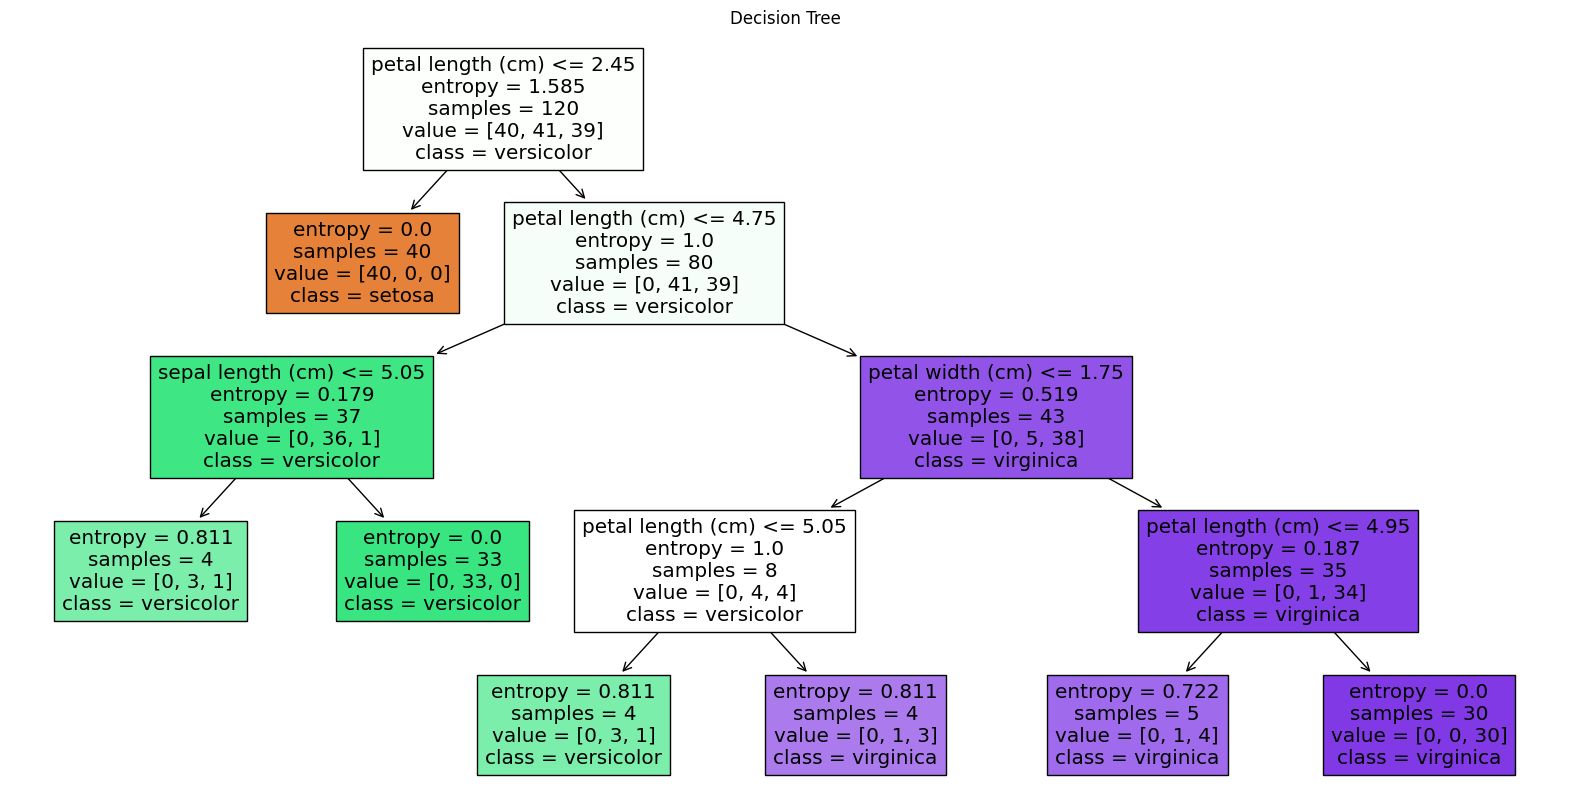

In [11]:
# Plot the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(grid_search.best_estimator_, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title("Decision Tree")
plt.show()

---

# <a id='toc3_'></a>[Task 2: Random Forest](#toc0_)

## <a id='toc3_1_'></a>[Implementing Random Forests](#toc0_)

### <a id='toc3_1_1_'></a>[Implement a Random Forest classifier on the Iris dataset](#toc0_)

In [12]:
random_forest = RandomForestClassifier(random_state=42)

In [13]:
# Fit the model to the training data
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### <a id='toc3_1_2_'></a>[Tune the hyperparameters of the Random Forest classifier](#toc0_)


In [14]:

# Define the parameter grid
param_grid_rf = {
    'n_estimators': [10, 50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


#### <a id='toc3_1_2_1_'></a>[GridSearchCV](#toc0_)

In [15]:
# Use GridSearchCV to tune the hyperparameters
grid_search_rf = GridSearchCV(estimator=random_forest, param_grid=param_grid_rf, cv=5, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 200]})

#### <a id='toc3_1_2_2_'></a>[Get the best parameters](#toc0_)

In [16]:

# Get the best parameters
best_params_rf = grid_search_rf.best_params_
print(f"Best hyperparameters for Random Forest: {best_params_rf}")

Best hyperparameters for Random Forest: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


#### <a id='toc3_1_2_3_'></a>[Prediction on the test set](#toc0_)

In [17]:

# Predict on the test set
y_pred_rf = grid_search_rf.best_estimator_.predict(X_test)

#### <a id='toc3_1_2_4_'></a>[ Calculate the accuracy of the model on the test dataset](#toc0_)

In [18]:

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest accuracy: {accuracy_rf}")

Random Forest accuracy: 1.0


---

### <a id='toc3_1_3_'></a>[Analyze the feature importances provided by the Random Forest](#toc0_)


In [19]:
feature_importances = grid_search_rf.best_estimator_.feature_importances_


#### <a id='toc3_1_3_1_'></a>[Plot feature importances](#toc0_)

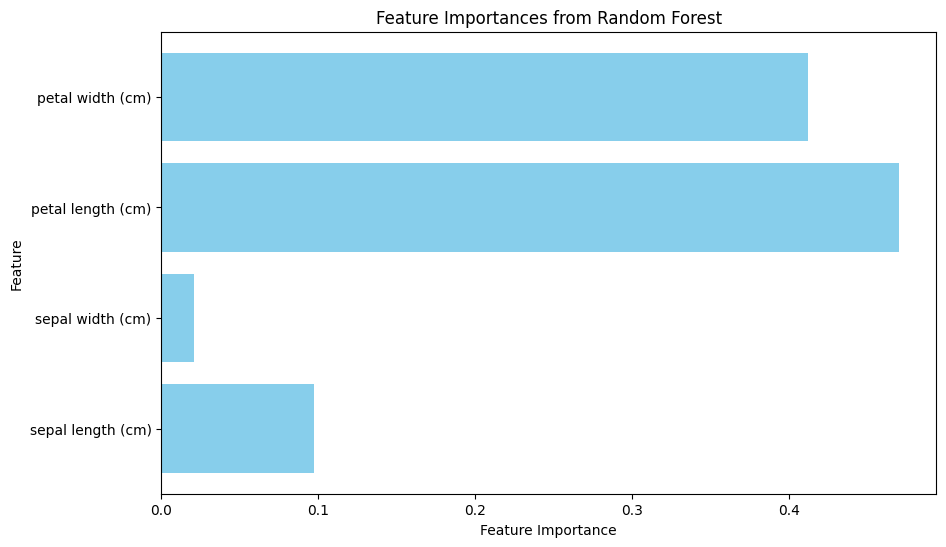

In [20]:
plt.figure(figsize=(10, 6))
plt.barh(iris.feature_names, feature_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Random Forest')
plt.show()

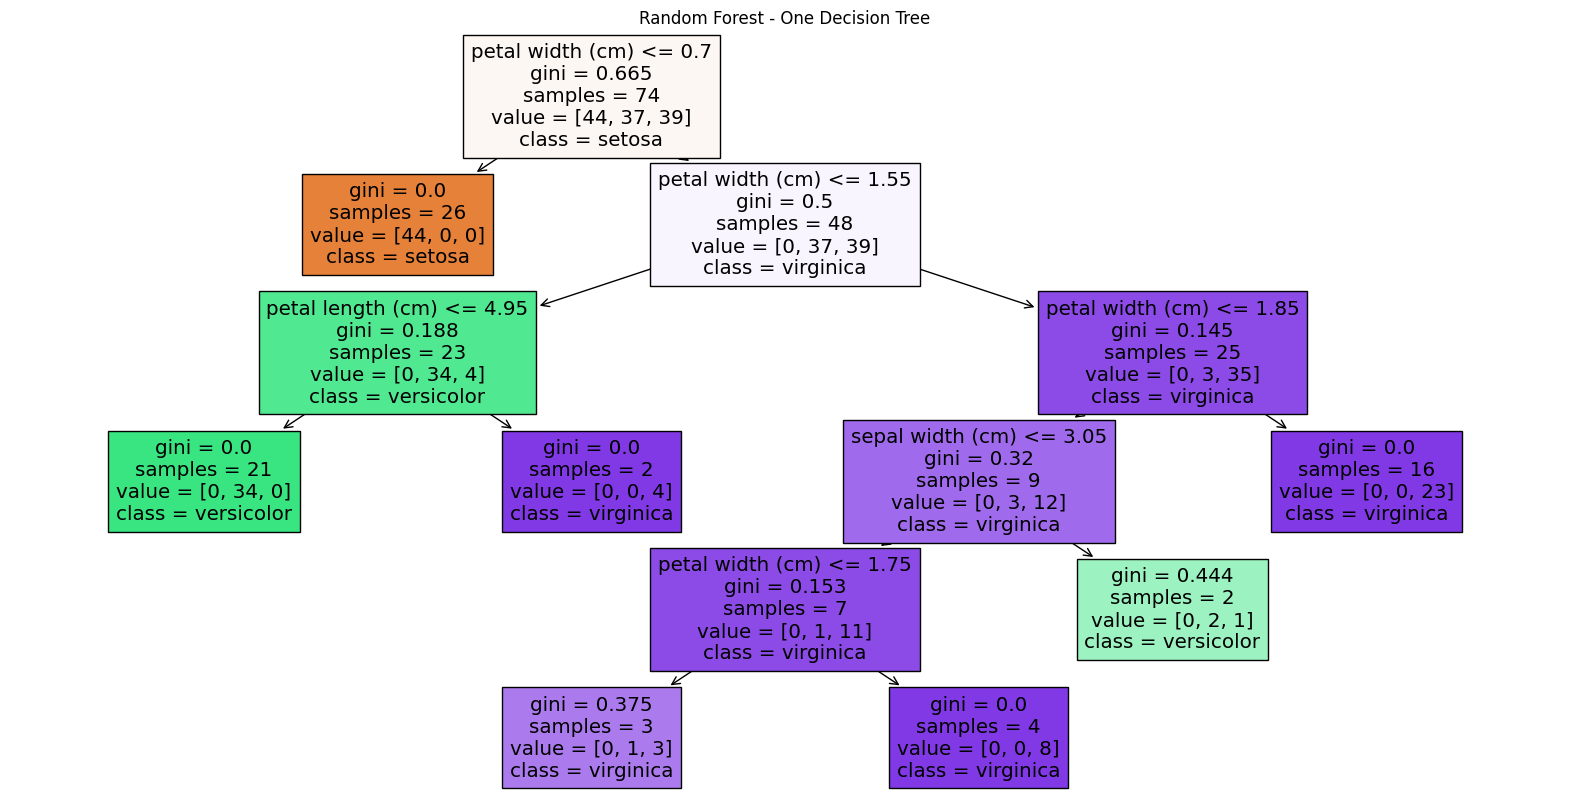

In [21]:

# Extract one tree from the Random Forest
tree_from_rf = grid_search_rf.best_estimator_.estimators_[0]

# Plot the extracted tree
plt.figure(figsize=(20,10))
plot_tree(tree_from_rf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title("Random Forest - One Decision Tree")
plt.show()